<a href="https://colab.research.google.com/github/parakalaAshwija/Batch11/blob/main/Correlation_and_Relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
        study_hours  sleep_hours  exam_score
count   200.000000   200.000000  200.000000
mean      4.922454     7.116715   38.451588
std       1.840397     1.391881   14.413555
min       1.000000     4.000000    9.830129
25%       3.589745     6.091244   26.486529
50%       4.991616     7.118259   38.737667
75%       6.001705     8.030847   49.421374
max      10.000000    10.000000   74.887728

First 5 Rows of Data:
    study_hours  sleep_hours  exam_score  gender
0     5.993428     7.536681   61.490181    Male
1     4.723471     7.841177   36.809350    Male
2     6.295377     8.624577   54.491609    Male
3     8.046060     8.580703   60.504206    Male
4     4.531693     4.933496   63.314266  Female


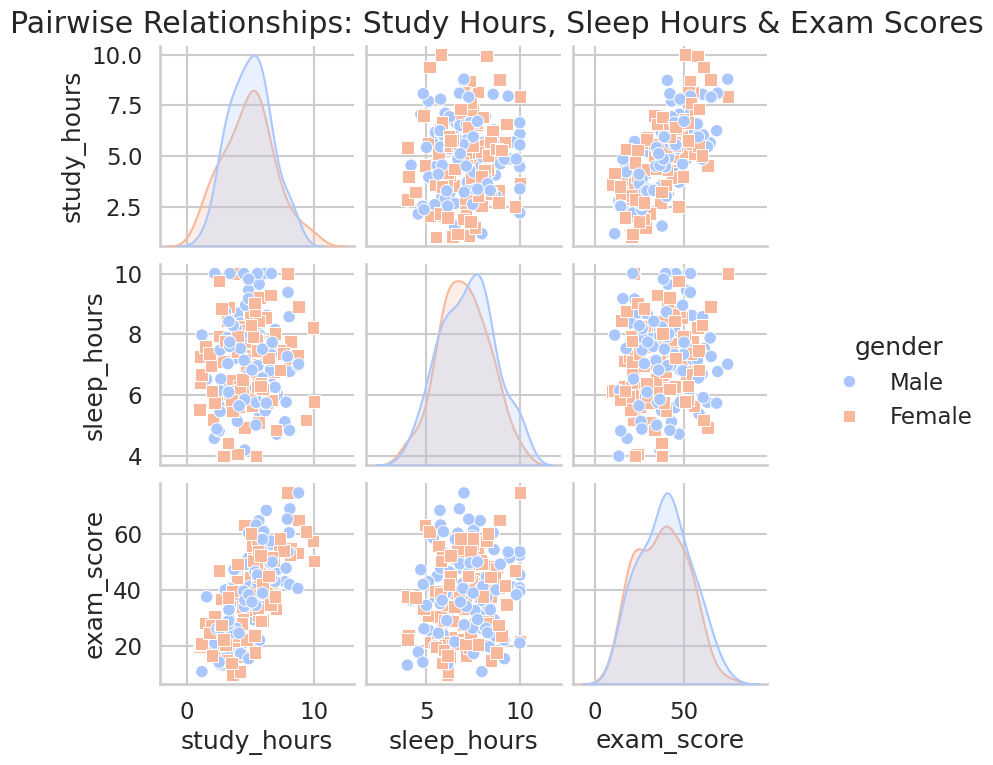

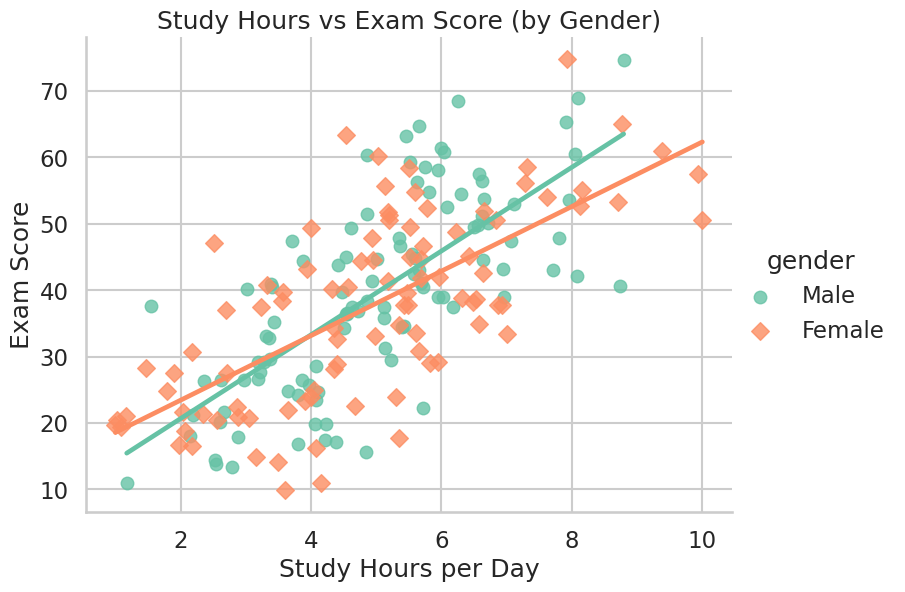

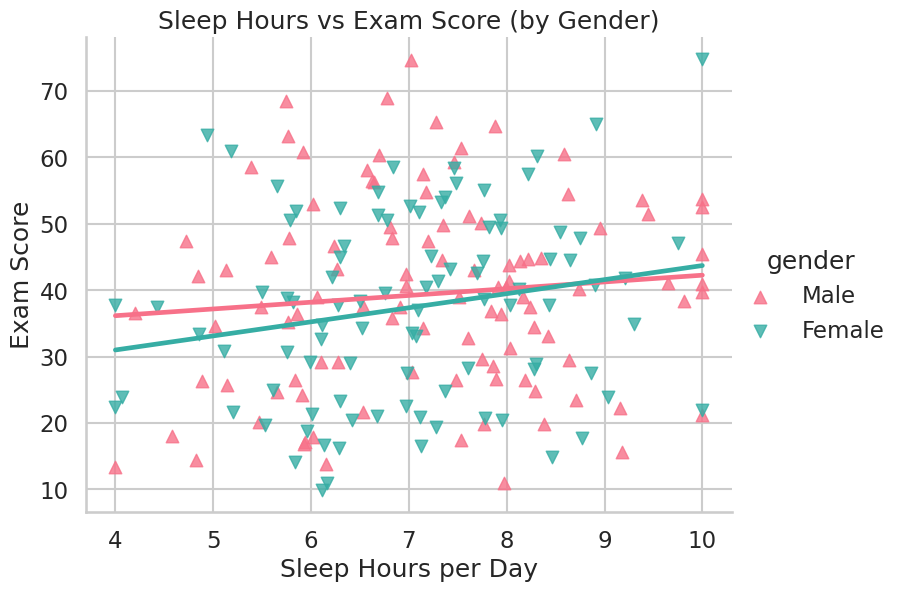

In [3]:
# ============================================================
# Correlation and Relationships Visualization (Seaborn Example)
# Scenario: Study Hours, Sleep Hours, Exam Scores for 200 Students
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Generate Synthetic Data for 200 Students
# ------------------------------------------------------------

np.random.seed(42)

n = 200
study_hours = np.random.normal(5, 2, n).clip(1, 10)       # average 5 hrs/day
sleep_hours = np.random.normal(7, 1.5, n).clip(4, 10)     # average 7 hrs/day
gender = np.random.choice(['Male', 'Female'], n)

# Exam score influenced by study hours (+ve) and sleep hours (moderate)
exam_score = (
    5 * study_hours + 2 * sleep_hours + np.random.normal(0, 10, n)
).clip(0, 100)

# Create a DataFrame
df = pd.DataFrame({
    'study_hours': study_hours,
    'sleep_hours': sleep_hours,
    'exam_score': exam_score,
    'gender': gender
})

# ------------------------------------------------------------
# 2. Basic Statistical Summary
# ------------------------------------------------------------

print("Summary Statistics:\n", df.describe())
print("\nFirst 5 Rows of Data:\n", df.head())

# ------------------------------------------------------------
# 3. Pairplot – Overview of All Relationships
# ------------------------------------------------------------

sns.set(style="whitegrid", context="talk")
pair = sns.pairplot(
    df,
    vars=['study_hours', 'sleep_hours', 'exam_score'],
    hue='gender',
    diag_kind='kde',
    palette='coolwarm',
    markers=['o', 's']
)
pair.fig.suptitle("Pairwise Relationships: Study Hours, Sleep Hours & Exam Scores", y=1.02)
plt.show()

# ------------------------------------------------------------
# 4. Detailed View: Study Hours vs Exam Score (with Regression Line)
# ------------------------------------------------------------

sns.lmplot(
    data=df,
    x='study_hours',
    y='exam_score',
    hue='gender',
    markers=['o', 'D'],
    palette='Set2',
    height=6,
    aspect=1.3,
    ci=None
)

plt.title("Study Hours vs Exam Score (by Gender)")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.show()

# ------------------------------------------------------------
# 5. Optional: Sleep Hours vs Exam Score
# ------------------------------------------------------------

sns.lmplot(
    data=df,
    x='sleep_hours',
    y='exam_score',
    hue='gender',
    markers=['^', 'v'],
    palette='husl',
    height=6,
    aspect=1.3,
    ci=None
)

plt.title("Sleep Hours vs Exam Score (by Gender)")
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Exam Score")
plt.show()
